# EDA Process

In this notebook we are going to do the exploratory data analysis of the csv that were loaded from the API in the former notebook

## Import the libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
import seaborn as sns
sns.set()

## Now the files

Frontpage files

In [84]:
a_df_access_broadband_narrowband = pd.read_csv("Page_Datasets/access_broadband_narrowband.csv")
b_df_access_fixed_internet_by_dowload_local = pd.read_csv("Page_Datasets/access_fixed_internet_by_dowload_local.csv")
c_df_access_fixed_internet_by_tecnology_local = pd.read_csv("Page_Datasets/access_fixed_internet_by_tecnology_local.csv")
d_df_access_fixed_internet_byprovince = pd.read_csv("Page_Datasets/access_fixed_internet_byprovince.csv")
e_df_dowload_speed_byprovince = pd.read_csv("Page_Datasets/dowload_speed_byprovince.csv")
f_df_fixed_internet_by_tech = pd.read_csv("Page_Datasets/fixed_internet_by_tech.csv")
g_df_internet_access_byspeed_download1 = pd.read_csv("Page_Datasets/internet_access_byspeed_download1.csv")
h_df_internet_access_byspeed_download2 = pd.read_csv("Page_Datasets/internet_access_byspeed_download2.csv")
i_df_internet_penetration = pd.read_csv("Page_Datasets/internet_penetration.csv")
j_df_localities_internet_access = pd.read_csv("Page_Datasets/localities_internet_access.csv")
k_df_median_download_fixed_internet = pd.read_csv("Page_Datasets/median_download_fixed_internet.csv")
m_df_national_access_by_fixed_internet = pd.read_csv("Page_Datasets/national_access_by_fixed_internet.csv")
n_df_national_internet_access = pd.read_csv("Page_Datasets/national_internet_access.csv")
o_df_penetration_by_national_home = pd.read_csv("Page_Datasets/penetration_by_national_home.csv")
p_df_profits_trimestrer_fixed_internet = pd.read_csv("Page_Datasets/profits_trimestrer_fixed_internet.csv")

Source files

In [85]:
df_internet_access_by_speed_local = pd.read_excel("Source_Datasets/internet_access_by_speed_local.xlsx")
df_internet_access_by_speed_province = pd.read_excel("Source_Datasets/internet_access_by_speed_province.xlsx")
df_internet_access_by_speed = pd.read_excel("Source_Datasets/internet_access_by_speed.xlsx")
df_internet_access_by_tech_local = pd.read_excel("Source_Datasets/internet_access_by_tech_local.xlsx")
df_internet_access_by_tech = pd.read_excel("Source_Datasets/internet_access_by_tech.xlsx")
df_internet_BAF = pd.read_excel("Source_Datasets/internet_BAF.xlsx")
df_internet_conect_map = pd.read_excel("Source_Datasets/internet_conect_map.xlsx")
df_internet_gains = pd.read_excel("Source_Datasets/internet_gains.xlsx")
df_internet_penetration = pd.read_excel("Source_Datasets/internet_penetration.xlsx")
df_internet_speed_hist = pd.read_excel("Source_Datasets/internet_speed_hist.xlsx")

## Now we look at the dataframes, one by one

In [86]:
a_df_access_broadband_narrowband.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6.0,5
1,2022,4,Capital Federal,2,2.0,2
2,2022,4,Catamarca,71,1.0,71
3,2022,4,Chaco,144,5.0,144
4,2022,4,Chubut,168,904.0,169


In [87]:
a_df_access_broadband_narrowband.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


We see that this df has no nulls

In [88]:
a_df_access_broadband_narrowband.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,864.000000,864.000000,864.000000,862.000000,864.000000
mean,2018.000000,2.500000,137.326389,150.595128,137.636574
std,2.583484,1.118682,180.812265,230.167337,180.798813
min,2014.000000,1.000000,1.000000,0.000000,1.000000
25%,2016.000000,1.750000,39.000000,2.000000,39.750000
50%,2018.000000,2.500000,90.500000,16.000000,91.000000
75%,2020.000000,3.250000,143.000000,253.500000,143.250000
max,2022.000000,4.000000,987.000000,998.000000,987.000000


For Banda ancha and Dial up and Banda ancha fija columns the mean and the median are not the same, so there are outliers to search or the data is very disperse. We will use a scatter to look that

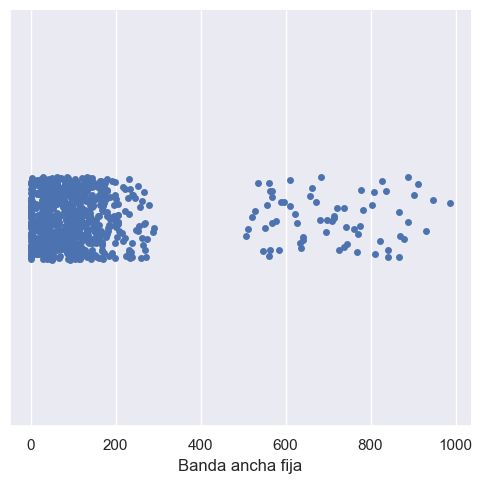

In [89]:
sns.catplot(data=a_df_access_broadband_narrowband, x = "Banda ancha fija")

Most of the values are under 400. We will see the values over that values and there is big gap between 300 and 500, we see a number of outliers after that value

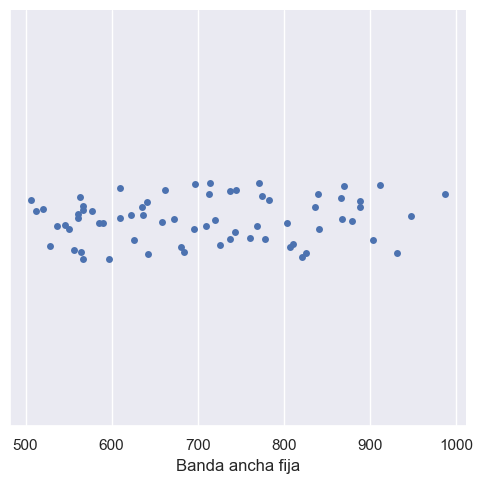

In [90]:
over = a_df_access_broadband_narrowband["Banda ancha fija"] > 400
over = a_df_access_broadband_narrowband[over]
sns.catplot(data=over, x = "Banda ancha fija")

The outliers are dispersed but no particular trend is seen

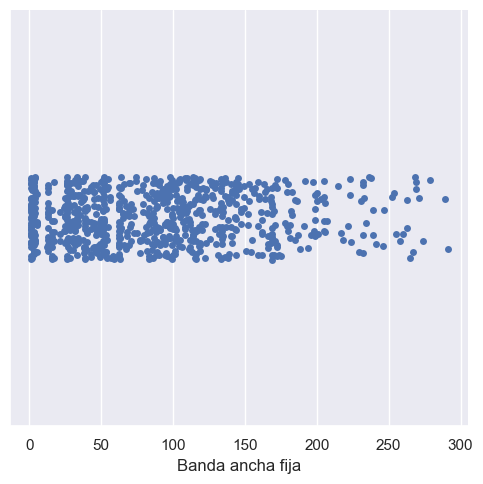

In [91]:
under = a_df_access_broadband_narrowband["Banda ancha fija"] < 400
under = a_df_access_broadband_narrowband[under]
sns.catplot(data=under, x = "Banda ancha fija")

Here you can see that most values between, under 400, are under 150 too, so majority of the number of access by quarter and province are under that value.

Let's see what is happening with Dial Up

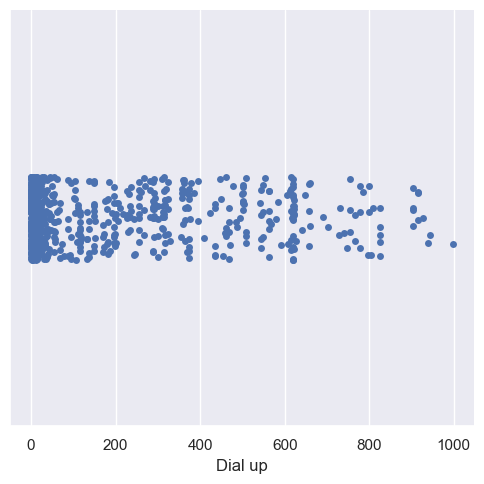

In [92]:
sns.catplot(data=a_df_access_broadband_narrowband, x = "Dial up")

You see a lot of values are under 200, and then, under 50

In [93]:
a_df_access_broadband_narrowband.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6.0,5
1,2022,4,Capital Federal,2,2.0,2
2,2022,4,Catamarca,71,1.0,71
3,2022,4,Chaco,144,5.0,144
4,2022,4,Chubut,168,904.0,169


Something weird to this dataframes is this, the unit number does not seems to be correct, since 5 + 6 is not 5, and is not the only one

In [94]:
d_df_access_fixed_internet_byprovince.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0


In [95]:
f_df_fixed_internet_by_tech.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1,6,3,573,222,11,Oct-Dic 2022
1,2022,3,1,6,3,557,235,11,Jul-Sept 2022
2,2022,2,1,6,3,556,232,11,Abr-Jun 2022
3,2022,1,2,6,2,546,252,11,Ene-Mar 2022
4,2021,4,2,6,2,523,253,10,Oct-Dic 2021


In [96]:
n_df_national_internet_access.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,11,12,11,Oct-Dic 2022
1,2022,3,11,12,11,Jul-Sept 2022
2,2022,2,11,12,11,Abr-Jun 2022
3,2022,1,11,13,11,Ene-Mar 2022
4,2021,4,10,13,10,Oct-Dic 2021


Same here and, since in the web page is not clear what unit numbers are this (millions? hundreds? thousends?), we decided to look at the source datasets were this came from. 

Some of them are the same, but the source one are more complete, or the data is better shaped in the original. Some examples:

In [97]:
df_internet_penetration.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2022,4,Buenos Aires,26.72
1,2022,4,Capital Federal,50.35
2,2022,4,Catamarca,16.73
3,2022,4,Chaco,11.66
4,2022,4,Chubut,26.23


In [98]:
i_df_internet_penetration.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN
1,2022,4,Capital Federal,"122,73",NaN,NaN,NaN
2,2022,4,Catamarca,"65,77",NaN,NaN,NaN
3,2022,4,Chaco,"43,62",NaN,NaN,NaN
4,2022,4,Chubut,"85,57",NaN,NaN,NaN


The decimal numbers are with "." instead of ",", which is better to work with in code

In [99]:
df_internet_access_by_speed_local.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6208.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.0


In [100]:
b_df_access_fixed_internet_by_dowload_local.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,61 Mbps,62 Mbps,64 Mbps,65 Mbps,66 Mbps,70 Mbps,75 Mbps,78 Mbps,80 Mbps,83 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


The second is more complete, since it covers more range of speed internet

In some cases, some of the are simplily a result of the source, with media in this case

In [101]:
df_internet_access_by_speed_province.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2022.0,4.0,Buenos Aires,97634.0,18.0,0.0,0.0,28724.0,192.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022.0,4.0,Capital Federal,106772.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022.0,4.0,Catamarca,2280.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022.0,4.0,Chaco,3909.0,0.0,225.0,111.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022.0,4.0,Chubut,20026.0,8.0,0.0,0.0,69.0,32.0,836.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
e_df_dowload_speed_byprovince.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000
1,2022,4,Capital Federal,18.286
2,2022,4,Catamarca,8.333
3,2022,4,Chaco,10.402
4,2022,4,Chubut,1.592


For all this reasons, we decided to use the source material, if it's needed for some analysis we will use the frompage derived csv, but mainly we will use the source xlsx transformed to dataframes archives

Let's see the first one

In [103]:
df_internet_access_by_speed_local.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6208.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.0


Okay, some of them have NaN values, we have to replace them with 0, because their represent that no one has that speed connection

In [104]:
df_internet_access_by_speed_local.fillna(value=0, inplace= True)

In [105]:
columns = df_internet_access_by_speed_local.columns
for column in columns:
    
    print(column)

Provincia
Partido
Localidad
Link Indec
Otros
0,256 Mbps
0,375 Mbps
0,5 Mbps
0,512 Mbps
0,625 Mbps
0,75 Mbps
1 Mbps
1,25 Mbps
1,5 Mbps
2 Mbps
2,2 Mbps
2,5 Mbps
3 Mbps
3,3 Mbps
3,5 Mbps
4 Mbps
4,5 Mbps
5 Mbps
6 Mbps
6,4 Mbps
7 Mbps
7,5 Mbps
8 Mbps
9 Mbps
10 Mbps
10,2 Mbps
11 Mbps
12 Mbps
12,3 Mbps
13 Mbps
14 Mbps
15 Mbps
16 Mbps
17 Mbps
18 Mbps
20 Mbps
20,5 Mbps
21 Mbps
22 Mbps
23 Mbps
24 Mbps
25 Mbps
25,1 Mbps
25,5 Mbps
26 Mbps
27 Mbps
30 Mbps
31 Mbps
32 Mbps
34 Mbps
35 Mbps
36 Mbps
38 Mbps
39 Mbps
40 Mbps
41 Mbps
45 Mbps
46 Mbps
48 Mbps
49 Mbps
50 Mbps
50,1 Mbps
50,25 Mbps
51 Mbps
55 Mbps
58 Mbps
59 Mbps
60 Mbps
61 Mbps
62 Mbps
64 Mbps
65 Mbps
66 Mbps
70 Mbps
75 Mbps
78 Mbps
80 Mbps
83 Mbps
85 Mbps
90 Mbps
92 Mbps
95 Mbps
100 Mbps
100,25 Mbps
110 Mbps
120 Mbps
122 Mbps
125 Mbps
126 Mbps
130 Mbps
140 Mbps
150 Mbps
157 Mbps
158 Mbps
160 Mbps
164 Mbps
165 Mbps
180 Mbps
200 Mbps
212 Mbps
220 Mbps
225 Mbps
234 Mbps
240 Mbps
250 Mbps
256 Mbps
275 Mbps
300 Mbps
320 Mbps
325 Mbps
330 Mbps
340 

We have a lot columns, so it will be difficult to graphicate them, so we will make new colunms 

In [106]:
df_internet_access_by_speed_local['less than 1 Mbps'] = df_internet_access_by_speed_local[["0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps","0,75 Mbps"]].sum(axis = 1)

Let's see if our code works properly

In [107]:
mask = df_internet_access_by_speed_local["Localidad"] == "25 de Mayo" 
mask = df_internet_access_by_speed_local[mask]
mask[["0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps","0,75 Mbps","less than 1 Mbps"]]

,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps","0,75 Mbps",less than 1 Mbps
0,0.0,0.0,2.0,0.0,0.0,19.0,21.0
1724,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1971,0.0,0.0,0.0,2.0,0.0,0.0,2.0


Works well, so we continue with the process, and delete the non usefull columns

In [108]:
df_internet_access_by_speed_local.drop(["0,256 Mbps","0,375 Mbps","0,5 Mbps",
                                         "0,512 Mbps","0,625 Mbps","0,75 Mbps"], axis = 1, inplace= True)

In [109]:
df_internet_access_by_speed_local["b'ween 1 and 10,2 Mbps"] = df_internet_access_by_speed_local[["1 Mbps","1,25 Mbps",
                                                                                           "1,5 Mbps","2 Mbps",
                                                                                           "2,2 Mbps",
                                                                                           "2,5 Mbps","3 Mbps",
                                                                                           "3,3 Mbps","3,5 Mbps",
                                                                                           "4 Mbps","4,5 Mbps","5 Mbps",
                                                                                           "6 Mbps","6,4 Mbps","7 Mbps",
                                                                                           "7,5 Mbps","8 Mbps","9 Mbps",
                                                                                           "10 Mbps","10,2 Mbps"]].sum(axis = 1)

In [110]:
df_internet_access_by_speed_local.drop(["1 Mbps","1,25 Mbps","1,5 Mbps",
                                         "2 Mbps","2,2 Mbps","2,5 Mbps",
                                         "3 Mbps","3,3 Mbps","3,5 Mbps","4 Mbps",
                                         "4,5 Mbps","5 Mbps",
                                        "6 Mbps","6,4 Mbps","7 Mbps",
                                        "7,5 Mbps","8 Mbps","9 Mbps",
                                        "10 Mbps","10,2 Mbps"], axis = 1, inplace= True)

In [111]:
columns = df_internet_access_by_speed_local.columns
for column in columns:
    
    print(column)

Provincia
Partido
Localidad
Link Indec
Otros
11 Mbps
12 Mbps
12,3 Mbps
13 Mbps
14 Mbps
15 Mbps
16 Mbps
17 Mbps
18 Mbps
20 Mbps
20,5 Mbps
21 Mbps
22 Mbps
23 Mbps
24 Mbps
25 Mbps
25,1 Mbps
25,5 Mbps
26 Mbps
27 Mbps
30 Mbps
31 Mbps
32 Mbps
34 Mbps
35 Mbps
36 Mbps
38 Mbps
39 Mbps
40 Mbps
41 Mbps
45 Mbps
46 Mbps
48 Mbps
49 Mbps
50 Mbps
50,1 Mbps
50,25 Mbps
51 Mbps
55 Mbps
58 Mbps
59 Mbps
60 Mbps
61 Mbps
62 Mbps
64 Mbps
65 Mbps
66 Mbps
70 Mbps
75 Mbps
78 Mbps
80 Mbps
83 Mbps
85 Mbps
90 Mbps
92 Mbps
95 Mbps
100 Mbps
100,25 Mbps
110 Mbps
120 Mbps
122 Mbps
125 Mbps
126 Mbps
130 Mbps
140 Mbps
150 Mbps
157 Mbps
158 Mbps
160 Mbps
164 Mbps
165 Mbps
180 Mbps
200 Mbps
212 Mbps
220 Mbps
225 Mbps
234 Mbps
240 Mbps
250 Mbps
256 Mbps
275 Mbps
300 Mbps
320 Mbps
325 Mbps
330 Mbps
340 Mbps
400 Mbps
450 Mbps
480 Mbps
500 Mbps
512 Mbps
520 Mbps
540 Mbps
600 Mbps
680 Mbps
700 Mbps
800 Mbps
850 Mbps
900 Mbps
950 Mbps
1000 Mbps
1024 Mbps
Total general
less than 1 Mbps
b'ween 1 and 10,2 Mbps


In [112]:
df_internet_access_by_speed_local["b'ween 11 and 27 Mbps"] = df_internet_access_by_speed_local[["11 Mbps","12 Mbps",
                                                                                              "12,3 Mbps","13 Mbps",
                                                                                              "14 Mbps","15 Mbps",
                                                                                              "16 Mbps","17 Mbps",
                                                                                              "18 Mbps","20 Mbps",
                                                                                              "20,5 Mbps","21 Mbps",
                                                                                              "22 Mbps","23 Mbps","24 Mbps",
                                                                                              "25 Mbps","25,1 Mbps",
                                                                                              "25,5 Mbps","26 Mbps","27 Mbps"]].sum(axis = 1)

In [113]:
df_internet_access_by_speed_local.drop(["11 Mbps","12 Mbps",
                                   "12,3 Mbps","13 Mbps",
                                   "14 Mbps","15 Mbps",
                                   "16 Mbps","17 Mbps",
                                   "18 Mbps","20 Mbps",
                                   "20,5 Mbps","21 Mbps",
                                   "22 Mbps","23 Mbps","24 Mbps",
                                   "25 Mbps","25,1 Mbps",
                                   "25,5 Mbps","26 Mbps","27 Mbps"],axis = 1, inplace= True)

In [114]:
df_internet_access_by_speed_local["b'ween 30 and 58 Mbps"] = df_internet_access_by_speed_local[["30 Mbps","31 Mbps",
                                                                                                "32 Mbps","34 Mbps",
                                                                                                "35 Mbps","36 Mbps",
                                                                                                "38 Mbps","39 Mbps",
                                                                                                "40 Mbps","41 Mbps",
                                                                                                "45 Mbps","46 Mbps",
                                                                                                "48 Mbps","49 Mbps",
                                                                                                "50 Mbps","50,1 Mbps",
                                                                                                "50,25 Mbps","51 Mbps",
                                                                                                "55 Mbps","58 Mbps",]].sum(axis = 1)
df_internet_access_by_speed_local.drop(["30 Mbps","31 Mbps","32 Mbps","34 Mbps","35 Mbps","36 Mbps",
                                        "38 Mbps","39 Mbps","40 Mbps","41 Mbps","45 Mbps","46 Mbps",
                                        "48 Mbps","49 Mbps","50 Mbps","50,1 Mbps","50,25 Mbps","51 Mbps",
                                        "55 Mbps","58 Mbps",], axis = 1, inplace=True)

In [115]:
df_internet_access_by_speed_local["b'ween 59 and 120 Mbps"] = df_internet_access_by_speed_local[["59 Mbps","60 Mbps",
                                                                                                 "61 Mbps","62 Mbps",
                                                                                                 "64 Mbps","65 Mbps",
                                                                                                 "66 Mbps","70 Mbps",
                                                                                                 "75 Mbps","78 Mbps",
                                                                                                 "80 Mbps","83 Mbps",
                                                                                                 "85 Mbps","90 Mbps",
                                                                                                 "92 Mbps","95 Mbps",
                                                                                                 "100 Mbps","100,25 Mbps",
                                                                                                 "110 Mbps","120 Mbps"]].sum(axis =1)
df_internet_access_by_speed_local.drop(["59 Mbps","60 Mbps","61 Mbps","62 Mbps","64 Mbps","65 Mbps",
                                        "66 Mbps","70 Mbps","75 Mbps","78 Mbps","80 Mbps","83 Mbps",
                                        "85 Mbps","90 Mbps","92 Mbps","95 Mbps","100 Mbps",
                                        "100,25 Mbps","110 Mbps","120 Mbps"], axis = 1, inplace=True)

In [116]:
df_internet_access_by_speed_local["b'ween 122 and 256 Mbps"] = df_internet_access_by_speed_local[["122 Mbps","125 Mbps",
                                                                                                  "126 Mbps","130 Mbps",
                                                                                                  "140 Mbps","150 Mbps",
                                                                                                  "157 Mbps","158 Mbps",
                                                                                                  "160 Mbps","164 Mbps",
                                                                                                  "165 Mbps","180 Mbps",
                                                                                                  "200 Mbps","212 Mbps",
                                                                                                  "220 Mbps","225 Mbps",
                                                                                                  "234 Mbps","240 Mbps",
                                                                                                  "250 Mbps","256 Mbps"]].sum(axis = 1)
df_internet_access_by_speed_local.drop(["122 Mbps","125 Mbps","126 Mbps","130 Mbps","140 Mbps","150 Mbps",
                                        "157 Mbps","158 Mbps","160 Mbps","164 Mbps","165 Mbps","180 Mbps",
                                        "200 Mbps","212 Mbps","220 Mbps","225 Mbps","234 Mbps","240 Mbps",
                                        "250 Mbps","256 Mbps"], axis = 1, inplace=True)

In [117]:
df_internet_access_by_speed_local["b'ween 275 and 540 Mbps"] = df_internet_access_by_speed_local[["275 Mbps","300 Mbps","320 Mbps",
                                                                                                  "325 Mbps","330 Mbps",
                                                                                                  "340 Mbps","400 Mbps",
                                                                                                  "450 Mbps","480 Mbps",
                                                                                                  "500 Mbps","512 Mbps",
                                                                                                  "520 Mbps","540 Mbps"]].sum(axis = 1)
df_internet_access_by_speed_local.drop(["275 Mbps","300 Mbps","320 Mbps","325 Mbps","330 Mbps","340 Mbps",
                                        "400 Mbps","450 Mbps","480 Mbps","500 Mbps","512 Mbps",
                                        "520 Mbps","540 Mbps"],axis = 1, inplace=True)

In [118]:
df_internet_access_by_speed_local["b'ween 600 and 1024 Mbps"] = df_internet_access_by_speed_local[["600 Mbps",
                                                                                                  "680 Mbps",
                                                                                                  "700 Mbps",
                                                                                                  "800 Mbps",
                                                                                                  "850 Mbps",
                                                                                                  "900 Mbps",
                                                                                                  "950 Mbps",
                                                                                                  "1000 Mbps",
                                                                                                  "1024 Mbps"]].sum(axis=1)
df_internet_access_by_speed_local.drop(["600 Mbps","680 Mbps","700 Mbps","800 Mbps","850 Mbps","900 Mbps",
                                       "950 Mbps","1000 Mbps","1024 Mbps"], axis = 1, inplace = True)

In [119]:
df_internet_access_by_speed_local.head()

,Provincia,Partido,Localidad,Link Indec,Otros,Total general,less than 1 Mbps,"b'ween 1 and 10,2 Mbps",b'ween 11 and 27 Mbps,b'ween 30 and 58 Mbps,b'ween 59 and 120 Mbps,b'ween 122 and 256 Mbps,b'ween 275 and 540 Mbps,b'ween 600 and 1024 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,6208.0,21.0,900.0,5141.0,134.0,12.0,0.0,0.0,0.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,59.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,192.0,1.0,191.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,66.0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,181.0,0.0,180.0,0.0,0.0,1.0,0.0,0.0,0.0


Now we can do the graphics to see distribution

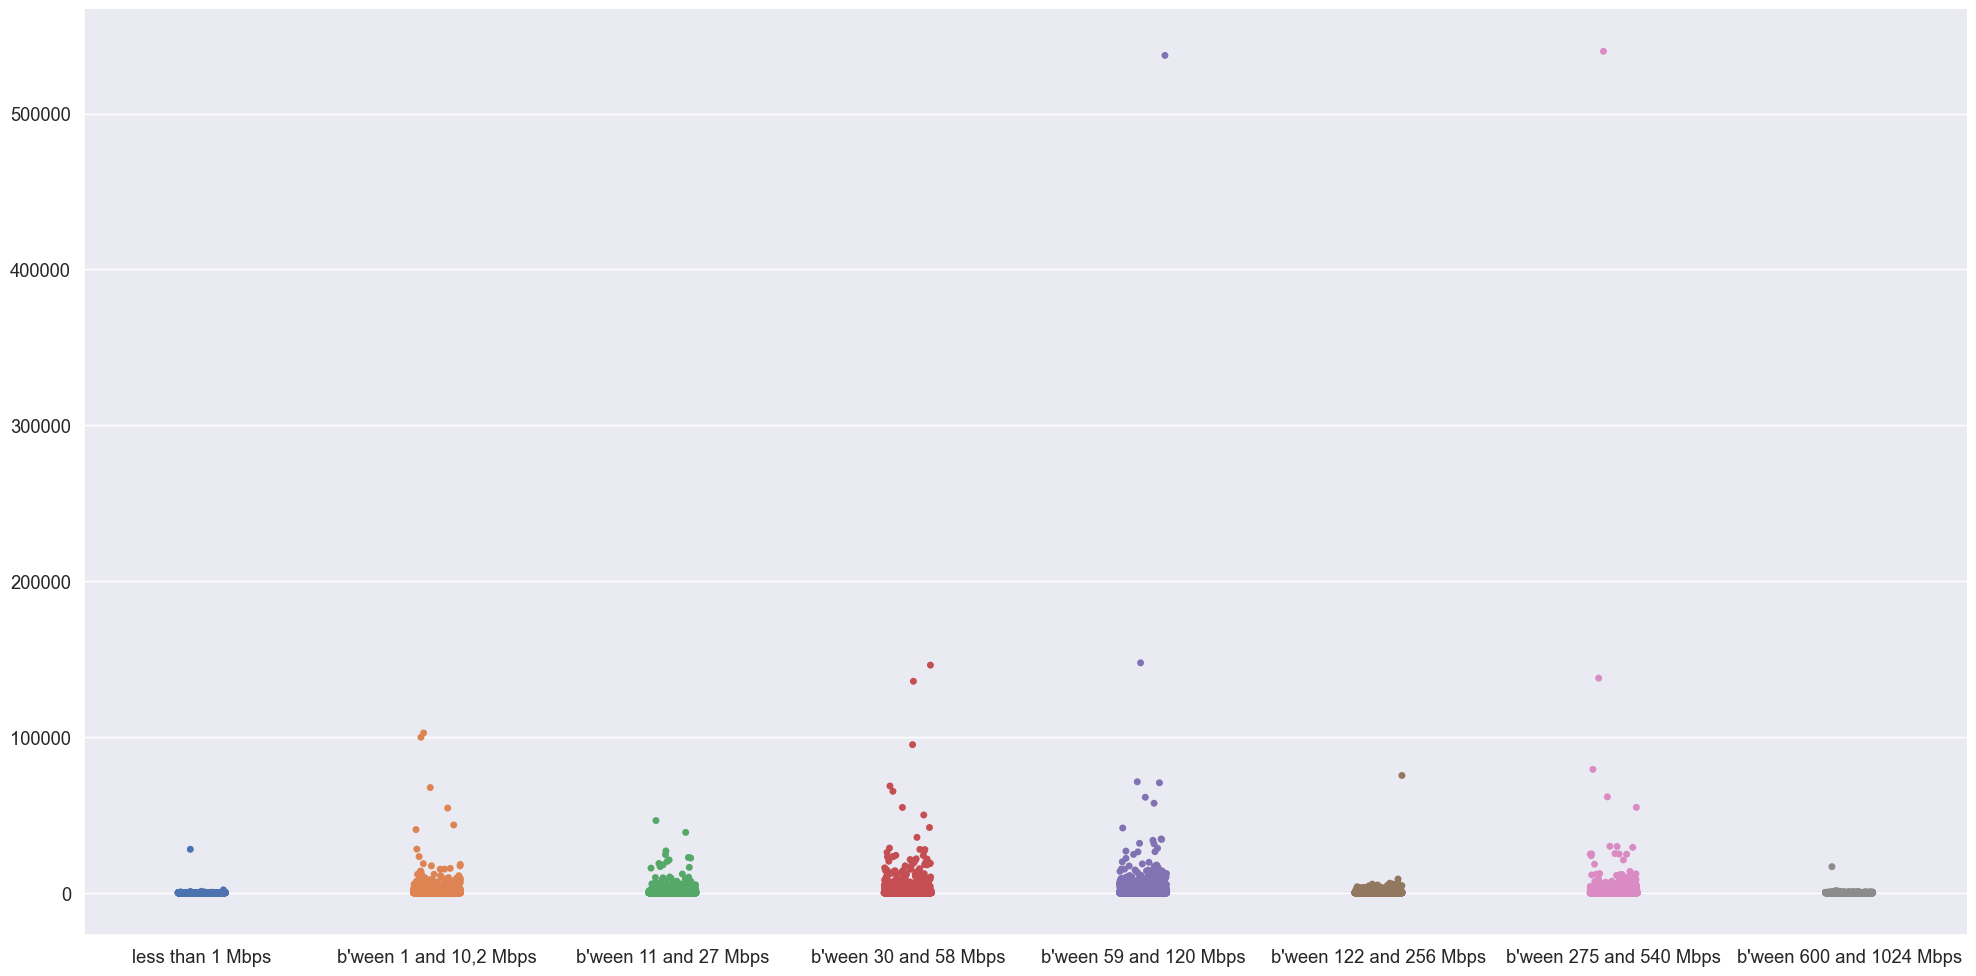

In [123]:
df = df_internet_access_by_speed_local.drop(columns=["Link Indec","Otros","Total general"])
# Crea el gráfico con el nuevo tamaño
sns.catplot(data=df, height=10, aspect=2)  # Ajusta 'height' y 'aspect' según tus necesidades

Ther is a locality that has more than 500000 conections between 59 and 120 mbps, same with 275 and 540

In [127]:
mask = (df_internet_access_by_speed_local["b'ween 59 and 120 Mbps"] > 500000) | (df_internet_access_by_speed_local["b'ween 275 and 540 Mbps"] > 500000)
df_internet_access_by_speed_local[mask]

,Provincia,Partido,Localidad,Link Indec,Otros,Total general,less than 1 Mbps,"b'ween 1 and 10,2 Mbps",b'ween 11 and 27 Mbps,b'ween 30 and 58 Mbps,b'ween 59 and 120 Mbps,b'ween 122 and 256 Mbps,b'ween 275 and 540 Mbps,b'ween 600 and 1024 Mbps
711,CABA,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,2000010,511.0,1445665.0,1823.0,99762.0,38707.0,135695.0,537285.0,75234.0,539938.0,16710.0


It's CABA, makes sense, it's the most developed locality in Argentina

We will make a new graphic without CABA to see the distribution in the rest of argentina, because there is big difference between CABA and the rest